## EDA on IPL data

Importing libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing Datasets

In [8]:
deli = pd.read_csv("deliveries.csv")
mat = pd.read_csv("matches.csv")

In [9]:
deliveries = deli.copy()
matches = mat.copy()

EDA : Exploratory Data Analysis

In [11]:
matches.shape

(756, 18)

In [12]:
deliveries.shape

(179078, 21)

In [13]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [14]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [16]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [17]:
matches.isnull().sum().sort_values(ascending=False)

umpire3            637
city                 7
winner               4
player_of_match      4
umpire2              2
umpire1              2
venue                0
win_by_wickets       0
win_by_runs          0
id                   0
season               0
result               0
toss_decision        0
toss_winner          0
team2                0
team1                0
date                 0
dl_applied           0
dtype: int64

In [18]:
deliveries.isnull().sum().sort_values(ascending=False)

fielder             172630
dismissal_kind      170244
player_dismissed    170244
bye_runs                 0
total_runs               0
extra_runs               0
batsman_runs             0
penalty_runs             0
noball_runs              0
legbye_runs              0
match_id                 0
inning                   0
is_super_over            0
bowler                   0
non_striker              0
batsman                  0
ball                     0
over                     0
bowling_team             0
batting_team             0
wide_runs                0
dtype: int64

In [19]:
# show how much data is available in percent
matches.count() / len(matches) * 100

id                 100.000000
season             100.000000
city                99.074074
date               100.000000
team1              100.000000
team2              100.000000
toss_winner        100.000000
toss_decision      100.000000
result             100.000000
dl_applied         100.000000
winner              99.470899
win_by_runs        100.000000
win_by_wickets     100.000000
player_of_match     99.470899
venue              100.000000
umpire1             99.735450
umpire2             99.735450
umpire3             15.740741
dtype: float64

In [20]:
matches.columns[matches.isna().any()]

Index(['city', 'winner', 'player_of_match', 'umpire1', 'umpire2', 'umpire3'], dtype='object')

In [21]:
nan_percentage = matches.isna().mean() * 100
nan_percentage[matches.columns[matches.isna().any()]]

city                0.925926
winner              0.529101
player_of_match     0.529101
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [52]:
matches['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [58]:
matches.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace=True)

In [60]:
matches['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: count, dtype: int64

In [62]:
matches.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

In [64]:
matches['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: count, dtype: int64

In [68]:
matches['season'].value_counts().sort_index()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: count, dtype: int64

<Axes: xlabel='season', ylabel='count'>

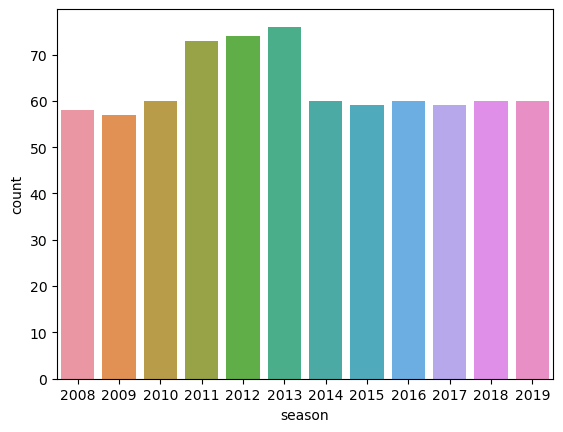

In [80]:
sns.countplot(data=matches, x = "season")

In [84]:
matches.groupby('season')['team1'].nunique()

season
2008     8
2009     8
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
2018     8
2019     8
Name: team1, dtype: int64

In [90]:
final_matches = matches.groupby('season').tail(1)

In [92]:
final_matches.set_index('season')['winner']

season
2017           Mumbai Indians
2008         Rajasthan Royals
2009          Deccan Chargers
2010      Chennai Super Kings
2011      Chennai Super Kings
2012    Kolkata Knight Riders
2013           Mumbai Indians
2014    Kolkata Knight Riders
2015           Mumbai Indians
2016      Sunrisers Hyderabad
2018      Chennai Super Kings
2019           Mumbai Indians
Name: winner, dtype: object

In [94]:
matches.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: count, Length: 100, dtype: int64

<Axes: xlabel='winner', ylabel='count'>

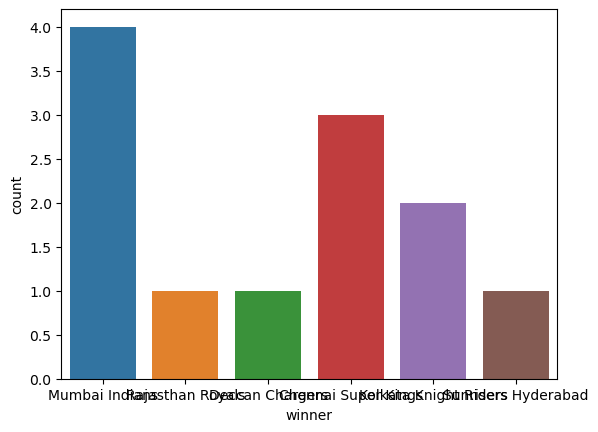

In [98]:
sns.countplot(data=final_matches, x='winner')

In [100]:
matches['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 90
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Kochi Tuskers Kerala            8
Name: count, dtype: int64

In [108]:
matches.groupby("season")["toss_winner"].value_counts()

season  toss_winner                
2008    Rajasthan Royals               11
        Deccan Chargers                 9
        Kings XI Punjab                 8
        Mumbai Indians                  8
        Delhi Capitals                  6
                                       ..
2019    Mumbai Indians                  8
        Kings XI Punjab                 6
        Kolkata Knight Riders           5
        Royal Challengers Bangalore     4
        Sunrisers Hyderabad             4
Name: count, Length: 100, dtype: int64

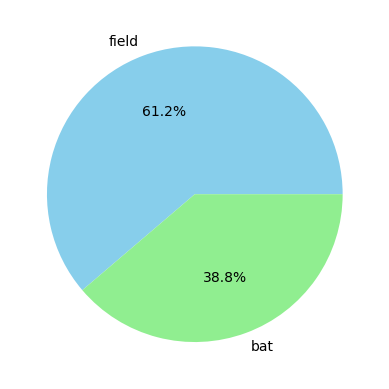

In [134]:
decision_counts = matches['toss_decision'].value_counts()
plt.pie(decision_counts, labels=decision_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.show()

<Axes: xlabel='count', ylabel='winner'>

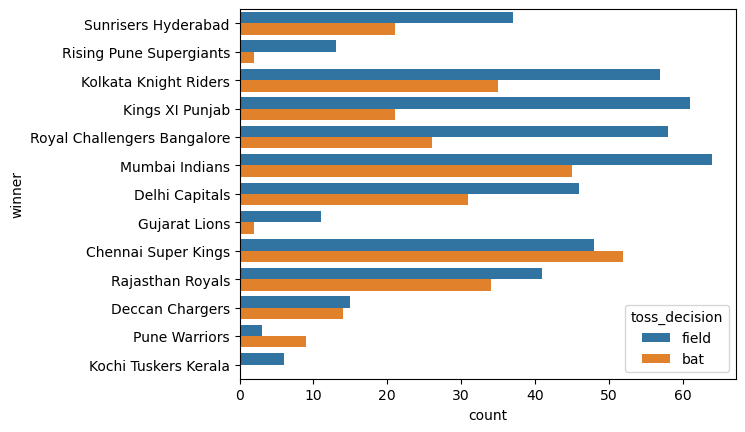

In [150]:
sns.countplot(data= matches, y='winner', hue='toss_decision')

In [152]:
# Total number of win by each team
matches['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: count, dtype: int64

<Axes: xlabel='winner'>

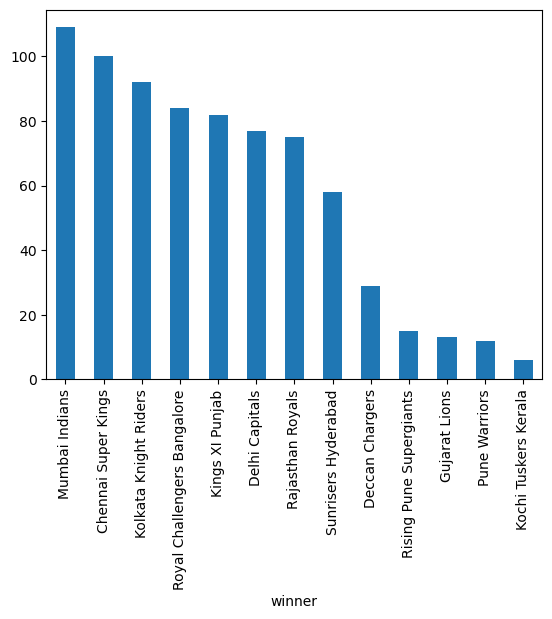

In [164]:
win_counts = matches['winner'].value_counts()
win_counts.plot(kind='bar')

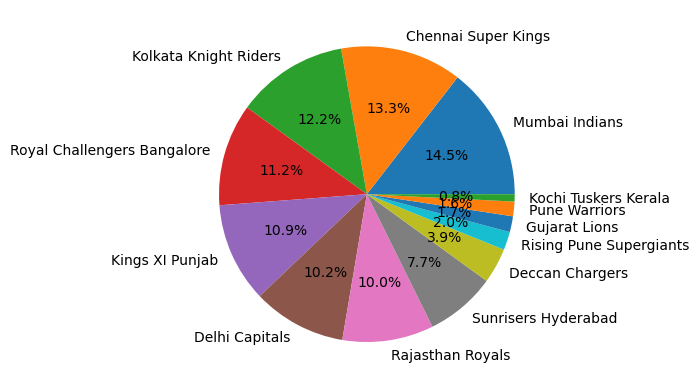

In [162]:
plt.pie(win_counts, labels=win_counts.index, autopct='%1.1f%%', )
plt.show()

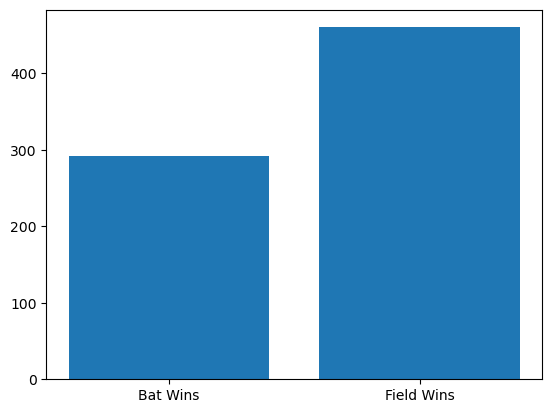

In [178]:
bat_wins = matches[matches['toss_decision'] == 'bat']['winner'].value_counts()
field_wins = matches[matches['toss_decision'] == 'field']['winner'].value_counts()
plt.bar(['Bat Wins', 'Field Wins'], [bat_wins.sum(), field_wins.sum()])
plt.show()

In [200]:
deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs', ascending=False)

,batsman,batsman_runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
...,...,...
172,IC Pandey,0
182,J Denly,0
326,P Raj,0
463,Sunny Gupta,0


In [219]:
deliveries.assign(total_runs=lambda x: x['is_super_over'] + x['bye_runs'] + x['legbye_runs'] + x['noball_runs'] + x['penalty_runs'] + x['batsman_runs'] + x['extra_runs']).groupby('batsman')['total_runs'].sum().reset_index().sort_values(by='total_runs', ascending=False)

,batsman,total_runs
428,SK Raina,5741
486,V Kohli,5682
367,RG Sharma,5122
112,DA Warner,5083
92,CH Gayle,5020
...,...,...
480,U Kaul,0
373,RR Bhatkal,0
55,Abdur Razzak,0
308,ND Doshi,0


In [235]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [255]:
# Top 10 bowlers
deliveries.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

bowler
SL Malinga         188
DJ Bravo           168
A Mishra           165
Harbhajan Singh    161
PP Chawla          156
B Kumar            141
R Ashwin           138
SP Narine          137
UT Yadav           136
R Vinay Kumar      127
Name: player_dismissed, dtype: int64

In [261]:
# Top 10 batsman
deliveries.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)

batsman
V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman_runs, dtype: int64

In [271]:
matches.drop(columns=['umpire3'], axis=1, inplace = True)

KeyError: "['umpire3'] not found in axis"

In [273]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [275]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [277]:
deliveries.drop(["player_dismissed", "dismissal_kind", "fielder"], axis = 1, inplace = True)

In [291]:
deliveries.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [297]:
matches[matches.isnull().any(axis=1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
